## 1. Isolation Forests

### a. Data Prep

In [2]:
# import pandas and pull file entertainment_clean.csv
import pandas as pd

df = pd.read_csv('../Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [10]:
# keep only the numeric columns
model = df.iloc[:,1:]
model.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [8]:
# note the shape of the data
model.shape

(150, 3)

### b. Fit an Isolation Forest Model

In [14]:
# import isolation forest from sklearn
from sklearn.ensemble import IsolationForest

In [15]:
# fit an isolation forest model with "7%" of the data set as anomalies
forest = IsolationForest(contamination=0.07)
forest.fit(model)

IsolationForest(contamination=0.07)

In [18]:
# view the anomaly scores
df['anomaly_scores'] = forest.decision_function(model)
df.sort_values('anomaly_scores').head()

,name,books,tv_shows,video_games,anomaly_scores
110,Octavia,5.0,5.7,7.9,-0.090871
15,Avery,1.0,6.6,5.7,-0.088807
37,Elena,0.8,3.4,4.5,-0.068675
29,Clementine,6.2,5.4,7.2,-0.068610
147,Zara,5.5,5.7,7.7,-0.065795


In [20]:
# view the anomaly flags
df['anomaly'] = forest.predict(model)
df.sort_values('anomaly_scores').head(10)

,name,books,tv_shows,video_games,anomaly_scores,anomaly
110,Octavia,5.0,5.7,7.9,-0.090871,-1
15,Avery,1.0,6.6,5.7,-0.088807,-1
37,Elena,0.8,3.4,4.5,-0.068675,-1
29,Clementine,6.2,5.4,7.2,-0.068610,-1
147,Zara,5.5,5.7,7.7,-0.065795,-1
58,Hailey,2.5,3.0,5.0,-0.053917,-1
148,Zoe,0.0,6.1,5.2,-0.039871,-1
42,Elizabeth,0.0,4.5,4.3,-0.028129,-1
19,Bianca,5.8,3.9,7.7,-0.024077,-1
129,Sofia,0.5,6.0,5.8,-0.008044,-1


### c. Visualize the Anomalies

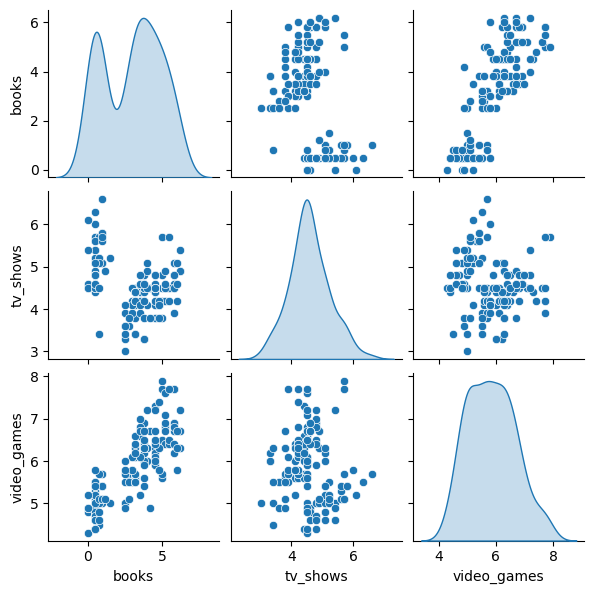

In [22]:
# view a pair plot of the original data set 
import seaborn as sns

sns.pairplot(model, diag_kind='kde', height=2);

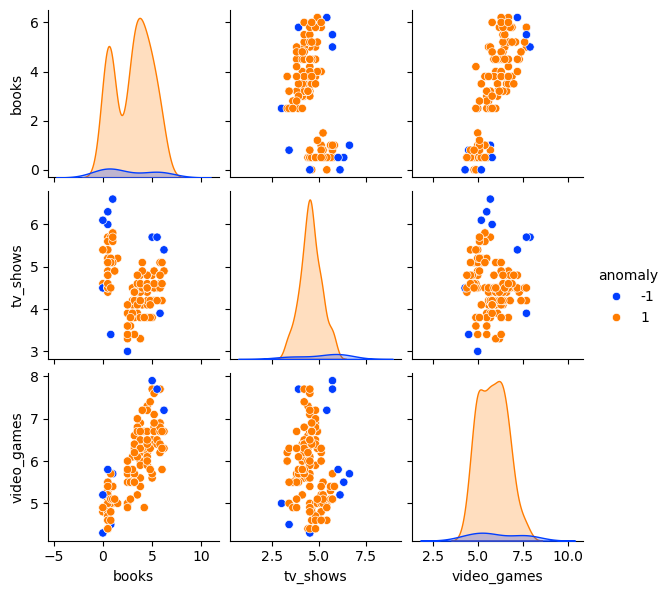

In [24]:
#overlay the isolation forest detected outliers

sns.pairplot(df.drop(columns='anomaly_scores'), hue='anomaly', palette='bright', height=2);

In [46]:
df['anomaly'].value_counts()

anomaly
 1    139
-1     11
Name: count, dtype: int64